🧠 Business Scenario
An automobile company wants to understand how engine size affects the price of a car.
From past observations, the product team believes:
For small engines, price increases slowly
For medium engines, price increases rapidly
For very large engines, price growth slows down due to luxury saturation
This indicates that the relationship between engine size and price is not strictly linear.
You are hired as a Data Analyst to analyze this pattern and build a model that can predict car prices accurately.
 
📝 Tasks
Load the dataset and identify the relevant columns.
Use:
Engine size as the input feature
Car price as the output variable
Visualize the relationship between engine size and price.
Build a predictive model to estimate car price based on engine size.
Predict the price for a car with:
Engine size = 200
Increase the flexibility of your model and observe how the curve changes.
Compare predictions from:
a simple straight-line model
a curved model
Analyze which model:
captures the trend better
gives more realistic predictions
Evaluate prediction errors and interpret them in business terms.
Answer the following:
Why does a straight-line model fail here?
What risk occurs if the curve becomes too flexible?
Which model would you recommend for production and why?
 

In [3]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
df=pd.read_csv("CarPrice_Assignment.csv")
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [4]:
# Input engine output price
X= df[['enginesize']]
y=df.iloc[:,-1].values
X,y


(     enginesize
 0           130
 1           130
 2           152
 3           109
 4           136
 ..          ...
 200         141
 201         141
 202         173
 203         145
 204         141
 
 [205 rows x 1 columns],
 array([13495.   , 16500.   , 16500.   , 13950.   , 17450.   , 15250.   ,
        17710.   , 18920.   , 23875.   , 17859.167, 16430.   , 16925.   ,
        20970.   , 21105.   , 24565.   , 30760.   , 41315.   , 36880.   ,
         5151.   ,  6295.   ,  6575.   ,  5572.   ,  6377.   ,  7957.   ,
         6229.   ,  6692.   ,  7609.   ,  8558.   ,  8921.   , 12964.   ,
         6479.   ,  6855.   ,  5399.   ,  6529.   ,  7129.   ,  7295.   ,
         7295.   ,  7895.   ,  9095.   ,  8845.   , 10295.   , 12945.   ,
        10345.   ,  6785.   ,  8916.5  ,  8916.5  , 11048.   , 32250.   ,
        35550.   , 36000.   ,  5195.   ,  6095.   ,  6795.   ,  6695.   ,
         7395.   , 10945.   , 11845.   , 13645.   , 15645.   ,  8845.   ,
         8495.   , 10595.   ,

Text(0.5, 1.0, 'Engine size vs price')

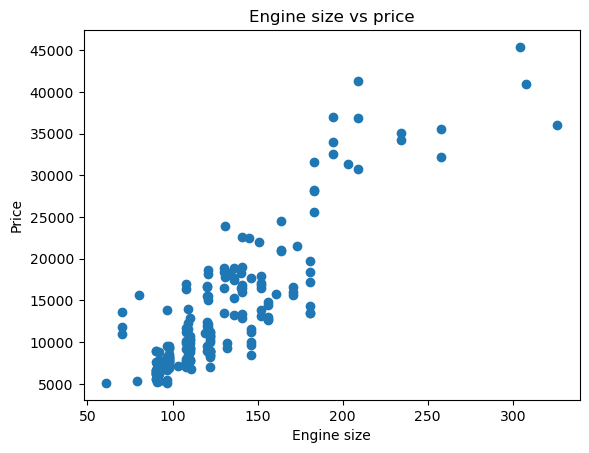

In [5]:
# Relation between the engine size and price
plt.scatter(X,y)
plt.xlabel("Engine size")
plt.ylabel('Price')
plt.title('Engine size vs price')

In [6]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

c:\Users\aksha\Documents\anaconda\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


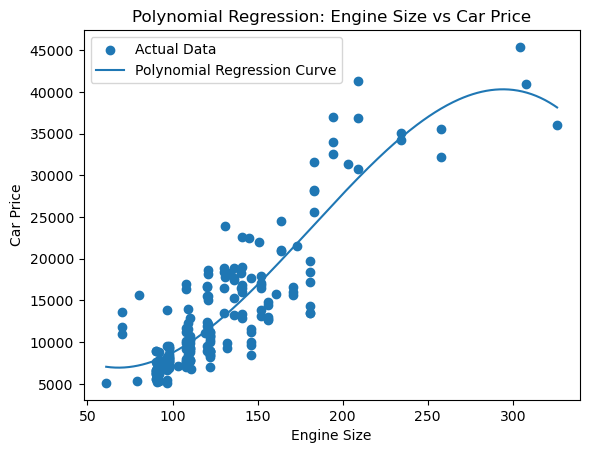

In [7]:
### Polynomial regression with degree 3

poly = PolynomialFeatures(degree=3)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)
model = LinearRegression()
model.fit(X_train_poly, y_train)
X_range = np.linspace(X.min(), X.max(), 300).reshape(-1, 1)

# Transform using polynomial features
X_range_poly = poly.transform(X_range)

# Predict prices
y_range_pred = model.predict(X_range_poly)

# Plot actual data
plt.scatter(X, y, label="Actual Data")

# Plot polynomial curve
plt.plot(X_range, y_range_pred, label="Polynomial Regression Curve")

plt.xlabel("Engine Size")
plt.ylabel("Car Price")
plt.title("Polynomial Regression: Engine Size vs Car Price")
plt.legend()
plt.show()


In [8]:
## Prediction using polynomial model 

engine_size = [[200]]

engine_size_poly = poly.transform(engine_size)
predicted_price = model.predict(engine_size_poly)
print("Predicted price for engine size 200:", predicted_price[0])


Predicted price for engine size 200: 27760.6083451159


c:\Users\aksha\Documents\anaconda\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


c:\Users\aksha\Documents\anaconda\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


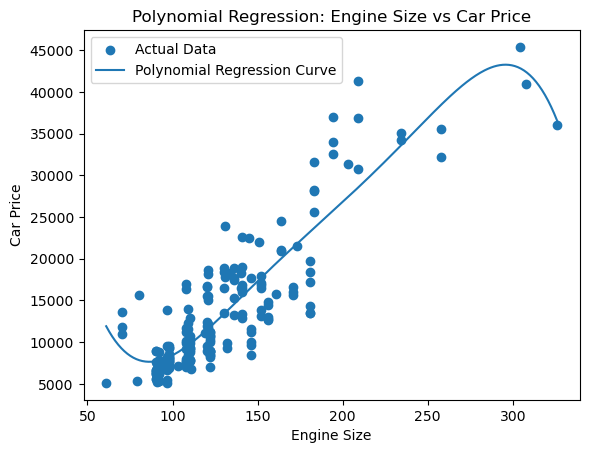

In [9]:
## Cheanging the flexibility by changing degree

poly = PolynomialFeatures(degree=5)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)
model = LinearRegression()
model.fit(X_train_poly, y_train)
X_range = np.linspace(X.min(), X.max(), 300).reshape(-1, 1)

# Transform using polynomial features
X_range_poly = poly.transform(X_range)

# Predict prices
y_range_pred = model.predict(X_range_poly)

# Plot actual data
plt.scatter(X, y, label="Actual Data")

# Plot polynomial curve
plt.plot(X_range, y_range_pred, label="Polynomial Regression Curve")

plt.xlabel("Engine Size")
plt.ylabel("Car Price")
plt.title("Polynomial Regression: Engine Size vs Car Price")
plt.legend()
plt.show()


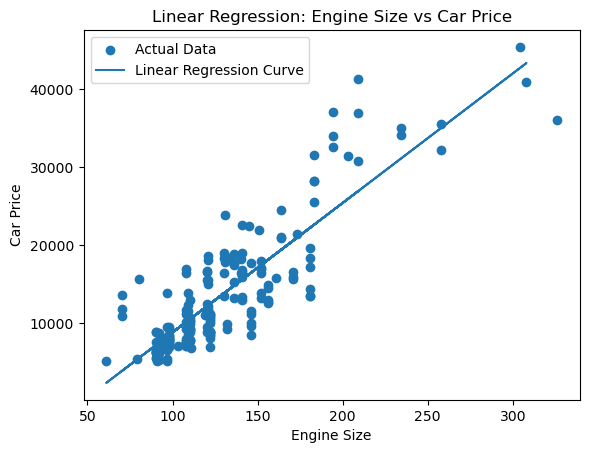

In [10]:
## linear regression model
lin=LinearRegression()
lin.fit(X_train,y_train)
y_pred=lin.predict(X_test)
plt.scatter(X, y, label="Actual Data")

# Plot polynomial curve
plt.plot(X_test, y_pred, label="Linear Regression Curve")

plt.xlabel("Engine Size")
plt.ylabel("Car Price")
plt.title("Linear Regression: Engine Size vs Car Price")
plt.legend()
plt.show()


In [11]:
## Linear regression prediction
new_engiesize = np.array([[200]])
predicted_price= lin.predict(new_engiesize)
 
print("Predicted price for engine size 200:", predicted_price[0])

Predicted price for engine size 200: 25427.147445039867


c:\Users\aksha\Documents\anaconda\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [15]:
### errors
from sklearn.metrics import mean_squared_error,r2_score,accuracy_score
print('Error by linear regression:')
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

r2_score_value = r2_score(y_test, y_pred)
print("R² Score:", r2_score_value)

y_test_pred = model.predict(poly.transform(X_test))

mse = mean_squared_error(y_test, y_test_pred)
r2_score_value = r2_score(y_test, y_test_pred)

print("Error by Polynomial regression:")
print("Mean Squared Error:", mse)
print("R² Score:", r2_score_value)





Error by linear regression:
Mean Squared Error: 15465458.965908466
R² Score: 0.8040958796678975
Error by Polynomial regression:
Mean Squared Error: 13441339.921602
R² Score: 0.8297358080849215


#### Polynomial Regression suits here because we get less error in polynomial when compared to linear regression model.When  polynomial model becomes too flexible it does not go through many data points.

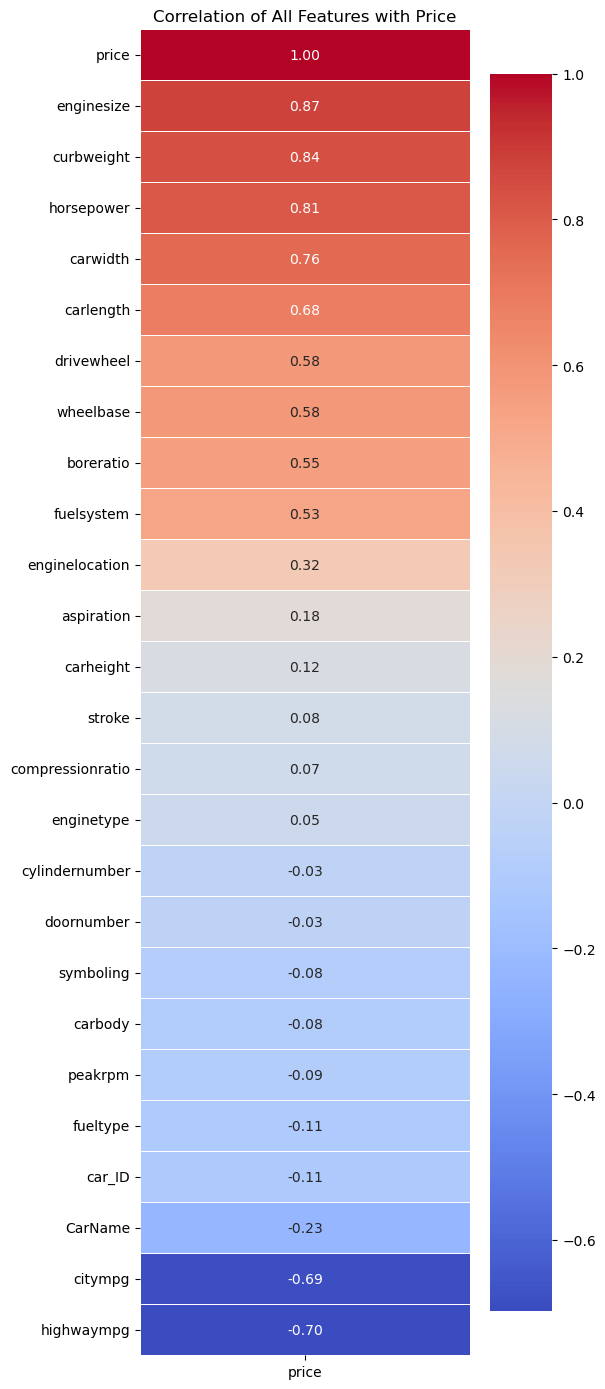

In [ ]:
## Feature to target relationship 

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

# encode all categorical columns
df_enc = df.copy()
le = LabelEncoder()
for c in df_enc.columns:
    if df_enc[c].dtype == 'object':
        df_enc[c] = le.fit_transform(df_enc[c])

# correlation of all features with price
price_corr = df_enc.corr()[['price']].sort_values(by='price', ascending=False)

# heatmap
plt.figure(figsize=(6, 14))
sns.heatmap(price_corr, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Correlation of All Features with Price")
plt.tight_layout()
plt.show()


highwaympg->strongly negative(-0.70)

citympg->strongly negative(-0.69)

carname->moderately negative(-0.23)

car_id->weakly negative(-0.11)

fueltype->weakly negative(-0.11)

peakrpm->weakly negative(-0.09)

carbody->weakly negative(-0.08)

symboling->weakly negative(-0.08)

doornumber->weakly negative(-0.03)

cylindernumber->weakly negative(-0.03)

enginetype->weakly positive(0.05)

compressionratio->weakly positive(0.07)

stroke->weakly positive(0.08)

carheight->weakly positive(0.12)

aspiration->weakly positive(0.18)

enginelocation->moderately positive(0.32)

fueltype->moderately positive(0.53)

boreratio->moderately positive(0.55)

wheelbase->moderately positive(0.58)

drivewheel->moderately positive(0.58)

carlength->moderately positive(0.68)

carwidth->strongly positive(0.76)

horsepower->strongly positive(0.81)

curbweight->strongly positive(0.84)

enginesize->strongly positive(0.87)
